In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df=yf.download("TATASTEEL.NS", start="2010-01-01", end="2023-01-01")

C:\Users\manth\AppData\Local\Temp\ipykernel_7624\3630311191.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("TATASTEEL.NS", start="2010-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2010-01-04,40.318615,40.493567,39.246632,39.571091,58460615
2010-01-05,41.295181,41.657811,40.623999,40.623999,81889733
2010-01-06,40.846653,41.988617,40.525376,41.988617,77150753
2010-01-07,41.339703,41.530562,40.722599,41.027970,80144960
2010-01-08,41.253819,42.084047,40.773493,41.416046,86063510


In [4]:

df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.reset_index(inplace=True)

df.rename(columns=lambda x: x.replace("TATASTEEL.NS", "").replace("__", "_"), inplace=True)
df.head()

,Date,Close_,High_,Low_,Open_,Volume_
0,2010-01-04,40.318615,40.493567,39.246632,39.571091,58460615
1,2010-01-05,41.295181,41.657811,40.623999,40.623999,81889733
2,2010-01-06,40.846653,41.988617,40.525376,41.988617,77150753
3,2010-01-07,41.339703,41.530562,40.722599,41.027970,80144960
4,2010-01-08,41.253819,42.084047,40.773493,41.416046,86063510


In [5]:
df.to_csv("../data/example.csv", index=False)

In [6]:
data=pd.read_csv("../data/example.csv")
data.head()

,Date,Close_,High_,Low_,Open_,Volume_
0,2010-01-04,40.318615,40.493567,39.246632,39.571091,58460615
1,2010-01-05,41.295181,41.657811,40.623999,40.623999,81889733
2,2010-01-06,40.846653,41.988617,40.525376,41.988617,77150753
3,2010-01-07,41.339703,41.530562,40.722599,41.027970,80144960
4,2010-01-08,41.253819,42.084047,40.773493,41.416046,86063510


In [7]:
df1=data.reset_index()['Close_']
df1

0        40.318615
1        41.295181
2        40.846653
3        41.339703
4        41.253819
           ...    
3204     97.401649
3205    103.106606
3206    102.039825
3207    103.663185
3208    104.498055
Name: Close_, Length: 3209, dtype: float64

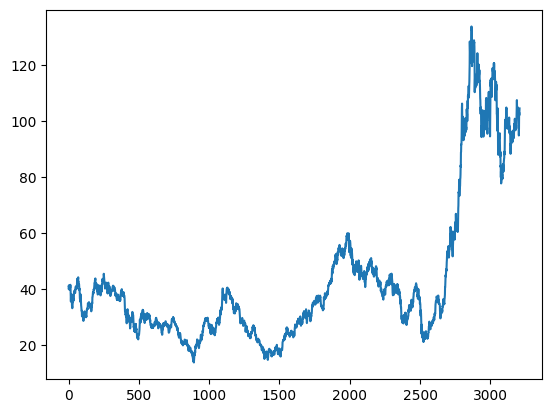

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.22058161]
 [0.22873012]
 [0.22498758]
 ...
 [0.73558554]
 [0.74913091]
 [0.75609709]]


In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df1,test_size=0.35,random_state=42,shuffle=False)

In [12]:
len(train_data),len(test_data)

(2085, 1124)

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
x_train, y_train = create_dataset(train_data, time_step=100)
x_test, y_test = create_dataset(test_data, time_step=100)

In [15]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM , Bidirectional

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Project\stock-price-forecasting\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10


31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 3.6300e-04 - val_loss: 0.0018
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 2.4441e-04 - val_loss: 0.0016
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 2.4130e-04 - val_loss: 0.0016
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 2.3299e-04 - val_loss: 0.0014
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 2.2668e-04 - val_loss: 0.0013
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 2.0260e-04 - val_loss: 0.0014
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 1.8920e-04 - val_loss: 0.0015
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 1.8050e-04 - val_loss: 0.0012
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 1.7354e-04 - val_loss: 0.0010


In [46]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [47]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train,train_predict))

33.61729299489688

In [49]:
math.sqrt(mean_squared_error(y_test,test_predict))

73.51714297037924

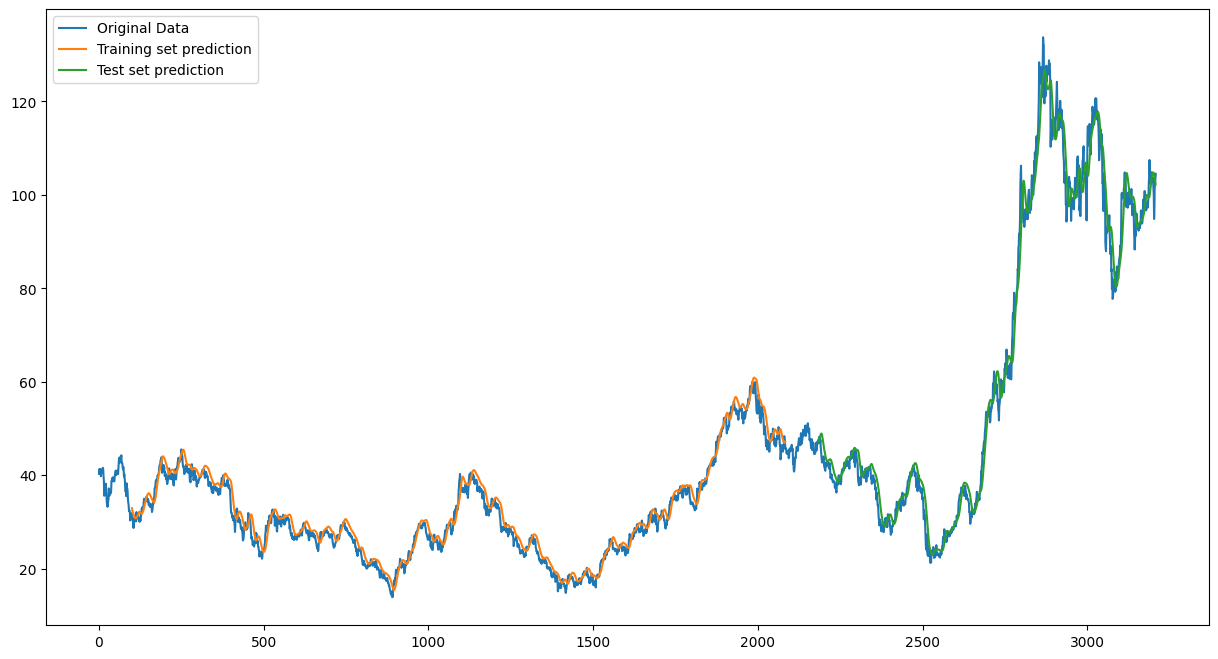

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data', 'Training set prediction', 'Test set prediction'])
plt.show()

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 783)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
lst_output = []
n_steps = 100
i = 0

while i < 30:

    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])   # take LAST 100 values
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.71507399 0.7139129  0.72939334 0.7286193  0.75609709 0.75880614
 0.75493606 0.75532311 0.73597253 0.69727143 0.717009   0.70888179
 0.70655973 0.71507399 0.69572341 0.72242716 0.70772076 0.70075458
 0.71159084 0.72474922 0.717009   0.70346363 0.7023026  0.71817003
 0.71817003 0.72900635 0.71236494 0.7023026  0.68217797 0.70307664
 0.69262731 0.68604812 0.69146628 0.65702231 0.63999385 0.62103032
 0.63380165 0.65276518 0.64541194 0.66708465 0.68566113 0.68372612
 0.68295202 0.66089238 0.66244047 0.65895738 0.65895738 0.65470025
 0.66321457 0.65857039 0.66514958 0.65973135 0.66747157 0.66747157
 0.69069224 0.67056768 0.67018069 0.66747157 0.66785863 0.67366384
 0.69494943 0.71004275 0.70539864 0.69456238 0.71662201 0.7255232
 0.72436223 0.70888179 0.70346363 0.70075458 0.69107929 0.69843246
 0.70036753 0.70075458 0.70617268 0.6961104  0.70539864 0.71739599
 0.74139069 0.75106592 0.78086577 0.75841915 0.74487371 0.74990495
 0.73906863 0.74874386 0.74487371 0.75919319 0.7429

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

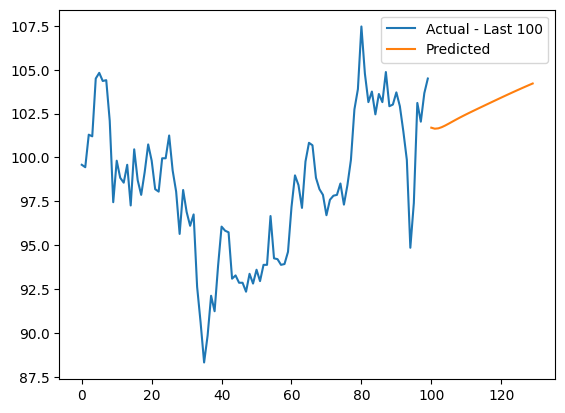

In [55]:
# reshape prediction
lst_output = np.array(lst_output).reshape(-1,1)

# Plot last 100 actual & 30 predicted
plt.plot(range(100), scaler.inverse_transform(df1[-100:]), label="Actual - Last 100")
plt.plot(range(100, 130), scaler.inverse_transform(lst_output), label="Predicted")
plt.legend()
plt.show()


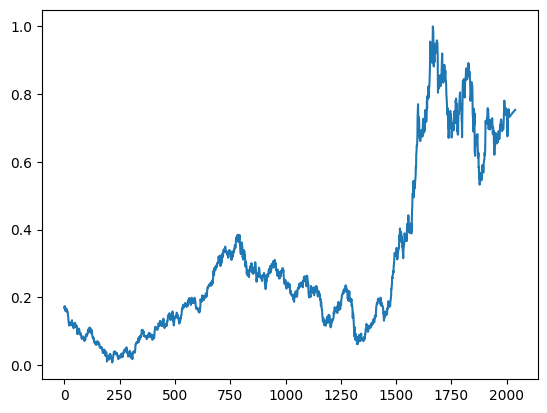

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])